#### This Jupyter notebook uses the Canadian Cheese Directory and the Canada Weather dataset to explore the relationship between cheese moisture and average temperature by season for each province. We also explore the distribution of seasonal temperature averages for the most produced cheese types of each province.

---
Library Setup and Data Preparation
---

In [8]:
# import libraries and datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cheeseData = pd.read_csv("cheese_data.xls")
weatherData = pd.read_csv("canada_weather.xls")

Get the average temperature of each province in the Summer and Winter seasons

In [2]:
# Add a province column to each entry
split = weatherData["Community"].str.split(", ", expand=True)
weatherData["Province"] = split[1]

# Add a column to just have Celcius values
tempCols = ["January(Avg. high °C (°F))", "January(Avg. low °C (°F))", "July(Avg. high °C (°F))", "July(Avg. low °C (°F))"]
newTempLabels = ["Jan High", "Jan Low", "July High", "July Low"]

for i in range(len(tempCols)):
    split = weatherData[tempCols[i]].str.split(" ()", expand=True)
    weatherData[newTempLabels[i]] = split[0]

# Convert new columns to float
for label in newTempLabels:
    weatherData[label] = weatherData[label].str.replace("−", "-").astype(float)

# Create temp average for both seasons
weatherData["Winter Avg"] = (weatherData["Jan High"] + weatherData["Jan Low"]) / 2
weatherData["Summer Avg"] = (weatherData["July High"] + weatherData["July Low"]) / 2

# Get provincial temp averages for both seasons; put into new data frame for ease of use.
provinceTemps = weatherData.groupby("Province", as_index=False).agg( # as_index=False lets us use the provinces as keys
    avg_summer_temp=("Summer Avg", "mean"),
    avg_winter_temp=("Winter Avg", "mean")
)

Get the average moisture of all cheese produced in each province

In [4]:
# get average cheese moisture by province
avgMoist = cheeseData.groupby("ManufacturerProvCode", as_index=False).agg(
    avg_moisture=("MoisturePercent", "mean")
)
avgMoist = avgMoist.rename(columns={"ManufacturerProvCode": "Province"})

Determine the most produced cheese type for each province

In [3]:
# Get count of each cheese type by province
cheeseCat = cheeseData.groupby(["ManufacturerProvCode", "CategoryTypeEn"])["CategoryTypeEn"].count()

# Get most made cheese in each province
cheeseProvinces = cheeseData["ManufacturerProvCode"].unique()
mostMadeCheese = {}
for prov in cheeseProvinces:
    mostMadeCheese[prov] = cheeseCat[prov].idxmax()

# turn most made cheese dictionary into data frame
mostMadeCheese = pd.Series(mostMadeCheese, name="most_made_cheese")

mostMadeCheese.index.name = "Province"
mostMadeCheese = mostMadeCheese.reset_index()

---
Graphs
---

Moisture Vs Temperature Scatterplots

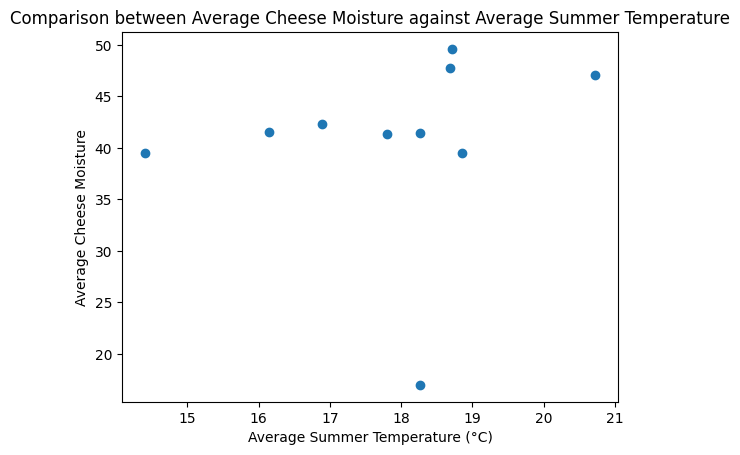

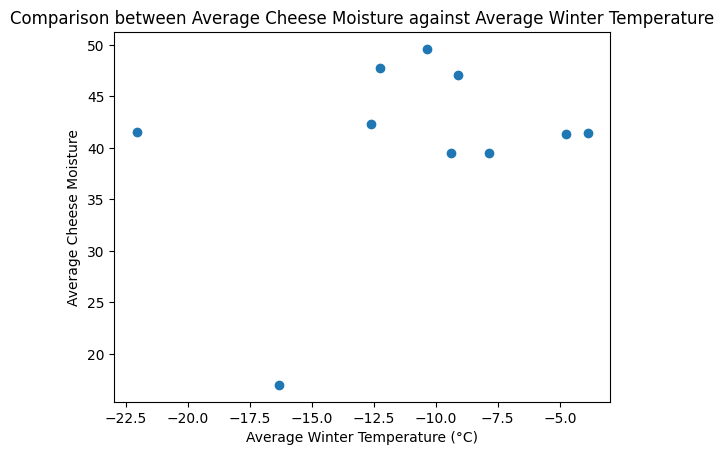

In [5]:
# Make Scatterplot comparing Moisture and Temperature Averages
joinTempsMoist = provinceTemps.merge(avgMoist, on="Province")

# summer temperatures
plt.scatter(joinTempsMoist["avg_summer_temp"], joinTempsMoist["avg_moisture"])
plt.xlabel("Average Summer Temperature (°C)")
plt.ylabel("Average Cheese Moisture")
plt.title("Comparison between Average Cheese Moisture against Average Summer Temperature")
plt.show()

# winter temperatures
plt.scatter(joinTempsMoist["avg_winter_temp"], joinTempsMoist["avg_moisture"])
plt.xlabel("Average Winter Temperature (°C)")
plt.ylabel("Average Cheese Moisture")
plt.title("Comparison between Average Cheese Moisture against Average Winter Temperature")
plt.show()

Temperature Vs Most Produced Cheese Type Boxplots

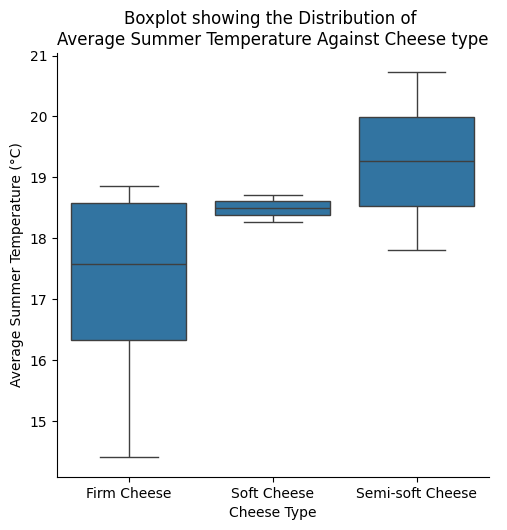

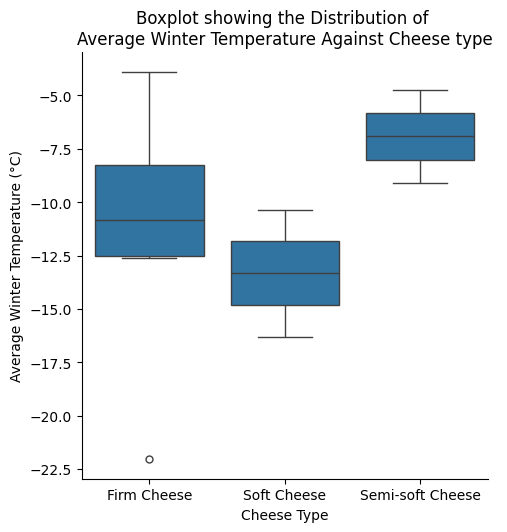

In [6]:
joinTempsCheeseType = provinceTemps.merge(mostMadeCheese, on="Province")

summerBox = sns.catplot(kind="box", data=joinTempsCheeseType, x="most_made_cheese", y="avg_summer_temp").set(title="Boxplot showing the Distribution of \nAverage Summer Temperature Against Cheese type")
summerBox.set_axis_labels("Cheese Type", "Average Summer Temperature (°C)")

winterBox = sns.catplot(kind="box", data=joinTempsCheeseType, x="most_made_cheese", y="avg_winter_temp").set(title="Boxplot showing the Distribution of \nAverage Winter Temperature Against Cheese type")
winterBox.set_axis_labels("Cheese Type", "Average Winter Temperature (°C)")

---
Discussion
---
Attached to my pull request should be a folder containing the graphs I made. Let's start with the temperature vs moisture graphs. I was fairly excited about this idea when I first started this assessment. I thought it would make a lot of sense if colder, drier areas had drier cheeses. If this were the case, then we could have talked about cheese preparation and storing methods that could be affected by the environment. 
<br></br>
However, in the end, there seemed to be very little correlation between average temperature and average cheese moisture. There are a few possible reasons I thought of that could have led to this lack of relationship. Firstly, averaging temperatures and moistures is, admittedly, somewhat simplistic. Regions vary greatly in terms of elevation, temperature variance, and proximity to bodies of water. By averaging the temperature, we disregard a lot of the nuances that could affect cheese moisture. Secondly, not all provinces are a part of the dataset. The cheese dataset doesn't include the northern-most provinces: Nunavut, the Yukon Territories, and the Northwest Territories. When looking at the temperature data, these were the coldest areas on average. Perhaps there aren't enough people living in these areas for us to gather cheese production data from. Or perhaps it is simply too cold to make cheese in these provinces, either because of difficulty in raising animals or the cheese making process itself. Therefore, a possible correlational relationship may not be apparent because of these missing data points. 
<br></br>
Moving on to the boxplots, it looks like firm cheese has a large variance of temperature, whereas soft cheese and semi-soft cheese seem to stay in the same general area of temperature. However, this could simply be a sampling distribution problem. The cheese groupings are based on the most produced type of cheese for each province. It isn't listed here, but the soft cheese group and the semi-soft cheese group only have 2 provinces each. The rest of the provinces produce firm cheese the most. Obviously, a sample size of 2 is very small and wouldn't be very reliable for making conclusions. Additionally, due to the larger sample size for firm cheese, it makes sense that the temperature variance is larger. Unfortunately, the boxplots only illustrate the effect of sample size on variance, rather than any relationship between cheese type production and temperature. 

---
Final Thoughts
---

Perhaps I lack imagination, but I had a lot of difficulty thinking of possible relationships that could exist between provincial weather and cheese production. Throughout the assessment, I kept wanting to see if there were relationships <i>within</i> the cheese data set. For example, does cheese type correlate with moisture? What's the distribution of cheese types for each province? One idea I had was to try to see if the type of milk relates to the flavour profile of the cheese. However, I think that would require some kind of language processing model to parse the meanings of the words in order to determine which flavour profiles were similar to each other. All in all, I felt like focusing on the weather made this task a lot less interesting for me, but it was still a nice way for me to practice my data analysis skills.